In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/netflix_users.csv')

In [ ]:
df.head(5)

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
df.isna().sum()

,0
User_ID,0
Name,0
Age,0
Country,0
Subscription_Type,0
Watch_Time_Hours,0
Favorite_Genre,0
Last_Login,0


# Exploratory Data Analysis
I began with understanding the dataset better by exploring its various columns and value present in it.

In [ ]:
kpis = {
    "total_users": int(df["User_ID"].nunique()),
    "avg_age": float(df["Age"].mean()),
    "avg_watch_time_hours": float(df["Watch_Time_Hours"].mean()),
    "share_heavy_watchers": float(df["Heavy_Watcher"].mean()),
}
kpis

{'total_users': 25000,
 'avg_age': 46.48288,
 'avg_watch_time_hours': 500.46885800000007,
 'share_heavy_watchers': 0.25}

### Users count per country:


In [ ]:
users_per_country = df.groupby('Country')['User_ID'].count()
display(users_per_country)

,User_ID
Country,
Australia,2437
Brazil,2503
Canada,2490
France,2473
Germany,2547
India,2505
Japan,2457
Mexico,2493
UK,2592


### Users count per subscription type:

In [ ]:
subscriptions_count = df.groupby('Subscription_Type')['User_ID'].count()
display(subscriptions_count)

,User_ID
Subscription_Type,
Basic,8356
Premium,8402
Standard,8242


### Distribution of users across different age bins:

In [ ]:
age_bins = [0, 18, 26, 36, 46, 56, 66, float('inf')]
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
display(df.head())

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_Bin
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,18-25
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,18-25
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,56-65
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,36-45
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,66+


In [ ]:
users_per_age_bin = df.groupby('Age_Bin')['User_ID'].count()
display(users_per_age_bin)

/tmp/ipython-input-3786312577.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users_per_age_bin = df.groupby('Age_Bin')['User_ID'].count()


,User_ID
Age_Bin,
0-17,1813
18-25,2951
26-35,3677
36-45,3704
46-55,3649
56-65,3733
66+,5473


### Users last login according to month and year

In [ ]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'])
display(df.head())

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_Bin
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,18-25
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,18-25
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,56-65
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,36-45
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,66+


In [ ]:
df['Last_Login_Year'] = df['Last_Login'].dt.year
df['Last_Login_Month'] = df['Last_Login'].dt.month
display(df.head())

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_Bin,Last_Login_Year,Last_Login_Month
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,18-25,2024,5
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,18-25,2025,2
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,56-65,2025,1
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,36-45,2024,3
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,66+,2025,1


In [ ]:
users_per_month_year = df.groupby(['Last_Login_Year', 'Last_Login_Month'])['User_ID'].count()
display(users_per_month_year)

Last_Login_Year  Last_Login_Month
2024             3                   1564
                 4                   2149
                 5                   2112
                 6                   1998
                 7                   2081
                 8                   2082
                 9                   2074
                 10                  2151
                 11                  2009
                 12                  2150
2025             1                   2111
                 2                   1973
                 3                    546
Name: User_ID, dtype: int64

# Understanding the revenue by subscription tier and country

Determine the revenue generated by each user based on their subscription type.


In [ ]:
subscription_revenue = {'Basic': 10, 'Standard': 15, 'Premium': 20}
df['Revenue'] = df['Subscription_Type'].map(subscription_revenue)
display(df.head())

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_Bin,Last_Login_Year,Last_Login_Month,Revenue
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,18-25,2024,5,20
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,18-25,2025,2,20
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,56-65,2025,1,10
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,36-45,2024,3,20
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,66+,2025,1,15


In [ ]:
total_revenue_by_tier_country = df.groupby(['Subscription_Type', 'Country'])['Revenue'].sum()
average_revenue_by_tier_country = df.groupby(['Subscription_Type', 'Country'])['Revenue'].mean()
display(total_revenue_by_tier_country)
display(average_revenue_by_tier_country)

Subscription_Type  Country  
Basic              Australia     7860
                   Brazil        8230
                   Canada        7950
                   France        8720
                   Germany       8250
                   India         8490
                   Japan         8120
                   Mexico        8640
                   UK            8730
                   USA           8570
Premium            Australia    16720
                   Brazil       17160
                   Canada       16600
                   France       16380
                   Germany      17540
                   India        16440
                   Japan        16560
                   Mexico       16640
                   UK           16980
                   USA          17020
Standard           Australia    12225
                   Brazil       12330
                   Canada       12975
                   France       11730
                   Germany      12675
                   India        12510
                   Japan        12255
                   Mexico       11955
                   UK           13050
                   USA          11925
Name: Revenue, dtype: int64

Subscription_Type  Country  
Basic              Australia    10.0
                   Brazil       10.0
                   Canada       10.0
                   France       10.0
                   Germany      10.0
                   India        10.0
                   Japan        10.0
                   Mexico       10.0
                   UK           10.0
                   USA          10.0
Premium            Australia    20.0
                   Brazil       20.0
                   Canada       20.0
                   France       20.0
                   Germany      20.0
                   India        20.0
                   Japan        20.0
                   Mexico       20.0
                   UK           20.0
                   USA          20.0
Standard           Australia    15.0
                   Brazil       15.0
                   Canada       15.0
                   France       15.0
                   Germany      15.0
                   India        15.0
                   Japan        15.0
                   Mexico       15.0
                   UK           15.0
                   USA          15.0
Name: Revenue, dtype: float64

## We identify top 10 high-revenue customer groups


In [ ]:
total_revenue_by_tier_country_sorted = total_revenue_by_tier_country.sort_values(ascending=False)
average_revenue_by_tier_country_sorted = average_revenue_by_tier_country.sort_values(ascending=False)
display("Top 10 Total Revenue by Tier and Country:")
display(total_revenue_by_tier_country_sorted.head(10))
display("Top 10 Average Revenue by Tier and Country:")
display(average_revenue_by_tier_country_sorted.head(10))

'Top 10 Total Revenue by Tier and Country:'

Subscription_Type  Country  
Premium            Germany      17540
                   Brazil       17160
                   USA          17020
                   UK           16980
                   Australia    16720
                   Mexico       16640
                   Canada       16600
                   Japan        16560
                   India        16440
                   France       16380
Name: Revenue, dtype: int64

'Top 10 Average Revenue by Tier and Country:'

Subscription_Type  Country  
Premium            Canada       20.0
                   France       20.0
                   Australia    20.0
                   Brazil       20.0
                   India        20.0
                   Germany      20.0
                   Mexico       20.0
                   Japan        20.0
                   USA          20.0
                   UK           20.0
Name: Revenue, dtype: float64

In [ ]:
# Recency based on the most recent Last_Login in the dataset
ref_date = df["Last_Login"].max()
df["Recency_Days"] = (ref_date - df["Last_Login"]).dt.days

# Age bands
bins = [0, 17, 24, 34, 44, 54, 64, 120]
labels = ["<=17", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["Age_Band"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Periods for trend charts
df["Login_Date"] = df["Last_Login"].dt.date
df["Login_Month"] = df["Last_Login"].dt.to_period("M").dt.to_timestamp()

# Heavy watcher flag: top 25% by watch time
threshold = df["Watch_Time_Hours"].quantile(0.75)
df["Heavy_Watcher"] = df["Watch_Time_Hours"] >= threshold

df.head()


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_Bin,Last_Login_Year,Last_Login_Month,Revenue,Recency_Days,Age_Band,Login_Date,Login_Month,Heavy_Watcher
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,18-25,2024,5,20,300,18-24,2024-05-12,2024-05-01,False
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,18-25,2025,2,20,31,18-24,2025-02-05,2025-02-01,False
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,56-65,2025,1,10,43,55-64,2025-01-24,2025-01-01,False
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,36-45,2024,3,20,348,35-44,2024-03-25,2024-03-01,False
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,66+,2025,1,15,53,65+,2025-01-14,2025-01-01,True


In [ ]:
sub_counts = df["Subscription_Type"].value_counts().rename_axis("Subscription_Type").reset_index(name="Users")
age_band_counts = df["Age_Band"].value_counts().sort_index().rename_axis("Age_Band").reset_index(name="Users")
genre_counts = df["Favorite_Genre"].value_counts().rename_axis("Favorite_Genre").reset_index(name="Users")
country_counts = df["Country"].value_counts().rename_axis("Country").reset_index(name="Users")

sub_counts.head(), age_band_counts.head(), genre_counts.head(), country_counts.head()


(  Subscription_Type  Users
 0           Premium   8402
 1             Basic   8356
 2          Standard   8242,
   Age_Band  Users
 0     <=17   1813
 1    18-24   2577
 2    25-34   3695
 3    35-44   3655
 4    45-54   3677,
   Favorite_Genre  Users
 0         Horror   3654
 1    Documentary   3636
 2         Action   3589
 3        Romance   3572
 4         Comedy   3561,
    Country  Users
 0       UK   2592
 1  Germany   2547
 2    India   2505
 3      USA   2503
 4   Brazil   2503)

### We analyse the last login count by days and months.
#### We observe that the login count spikes the most in Sept 2024 and drops in Dec 2024.

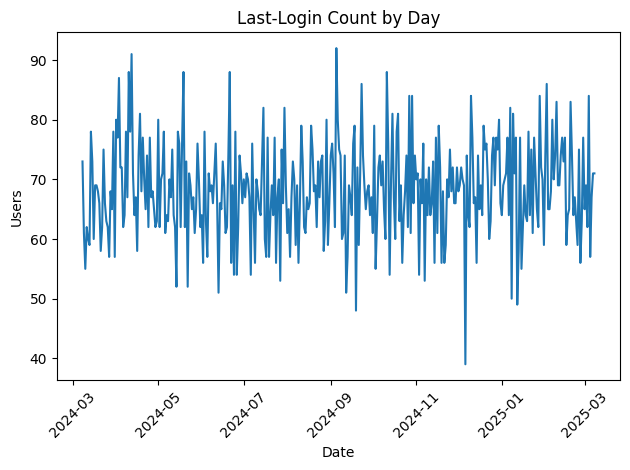

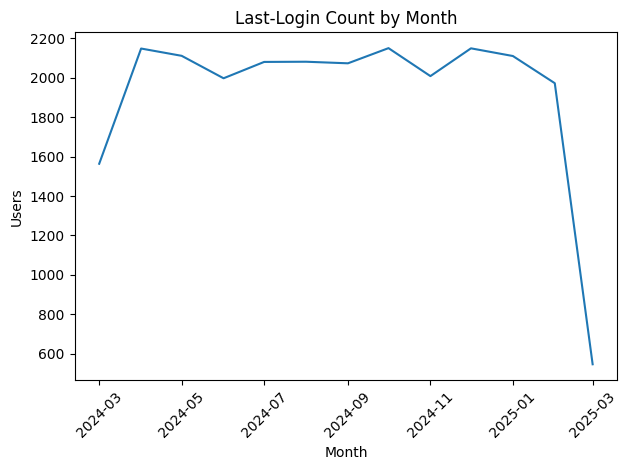

In [ ]:
# Day-level
dau_like = df.groupby("Login_Date")["User_ID"].nunique().reset_index(name="Users")
plt.figure()
plt.plot(dau_like["Login_Date"], dau_like["Users"])
plt.title("Last-Login Count by Day")
plt.xlabel("Date"); plt.ylabel("Users"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# Month-level
mau_like = df.groupby("Login_Month")["User_ID"].nunique().reset_index(name="Users")
plt.figure()
plt.plot(mau_like["Login_Month"], mau_like["Users"])
plt.title("Last-Login Count by Month")
plt.xlabel("Month"); plt.ylabel("Users"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()


### We segment users by their subscription type, age to identify top genres and top 10 countries having the highest users.

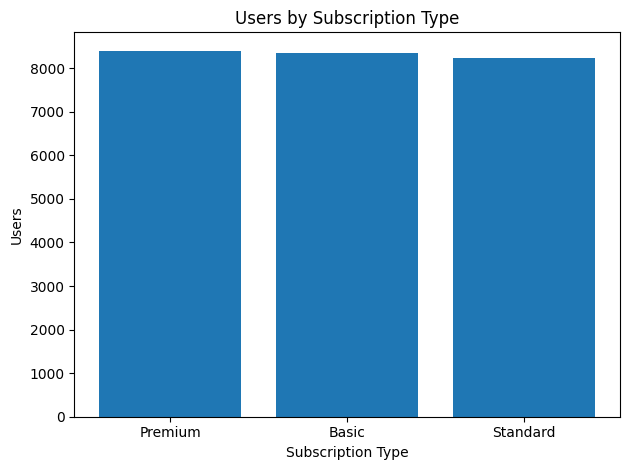

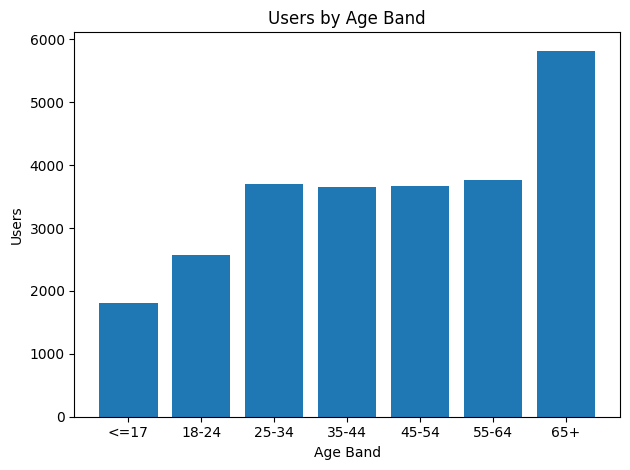

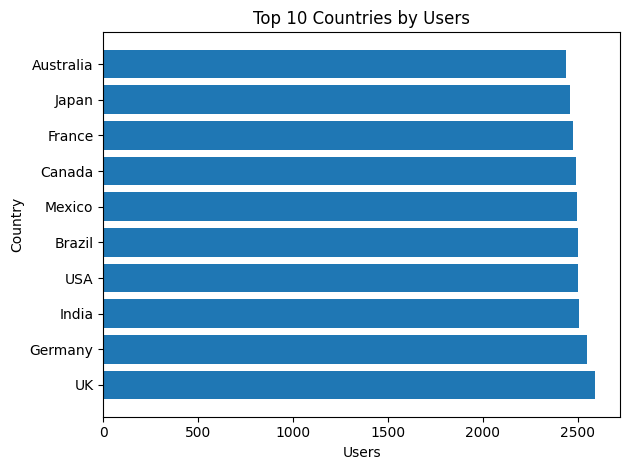

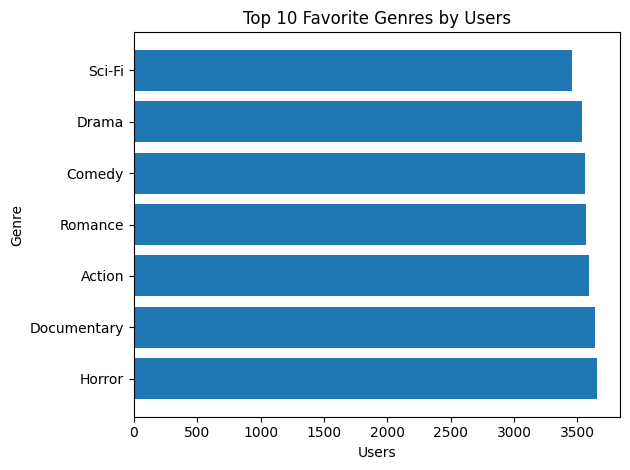

In [ ]:
# Users by subscription type
sub_counts_sorted = sub_counts.sort_values("Users", ascending=False)
plt.figure()
plt.bar(sub_counts_sorted["Subscription_Type"], sub_counts_sorted["Users"])
plt.title("Users by Subscription Type")
plt.xlabel("Subscription Type"); plt.ylabel("Users"); plt.tight_layout(); plt.show()

# Users by age band
plt.figure()
plt.bar(age_band_counts["Age_Band"].astype(str), age_band_counts["Users"])
plt.title("Users by Age Band")
plt.xlabel("Age Band"); plt.ylabel("Users"); plt.tight_layout(); plt.show()

# Top 10 countries
top_countries = country_counts.head(10)
plt.figure()
plt.barh(top_countries["Country"], top_countries["Users"])
plt.title("Top 10 Countries by Users")
plt.xlabel("Users"); plt.ylabel("Country"); plt.tight_layout(); plt.show()

# Top 10 genres
top_genres = genre_counts.head(10)
plt.figure()
plt.barh(top_genres["Favorite_Genre"], top_genres["Users"])
plt.title("Top 10 Favorite Genres by Users")
plt.xlabel("Users"); plt.ylabel("Genre"); plt.tight_layout(); plt.show()


### Engagement analysis to understand watch time distribution.

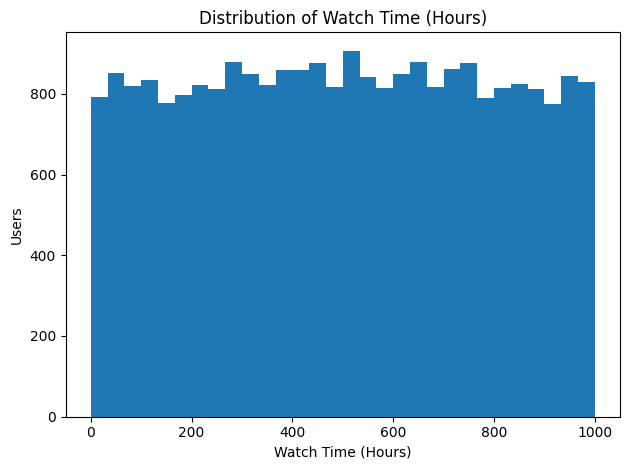

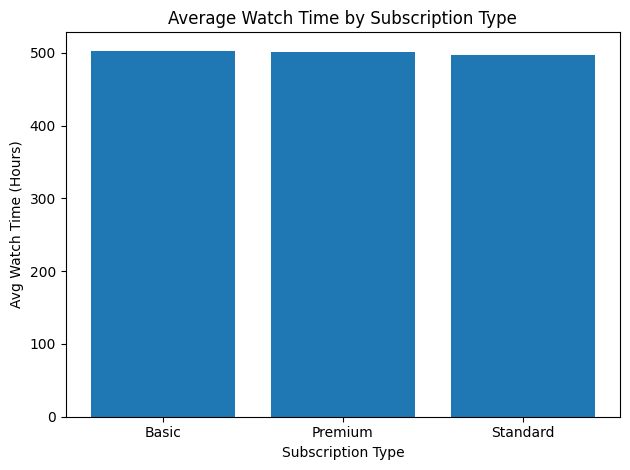

/tmp/ipython-input-2058187170.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_watch_by_age = df.groupby("Age_Band")["Watch_Time_Hours"].mean().reset_index()


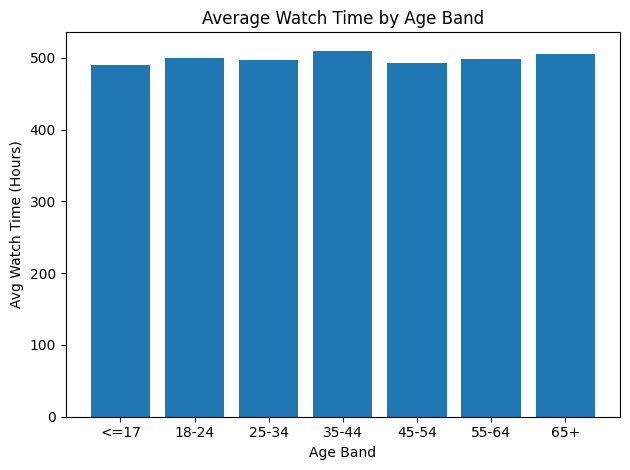

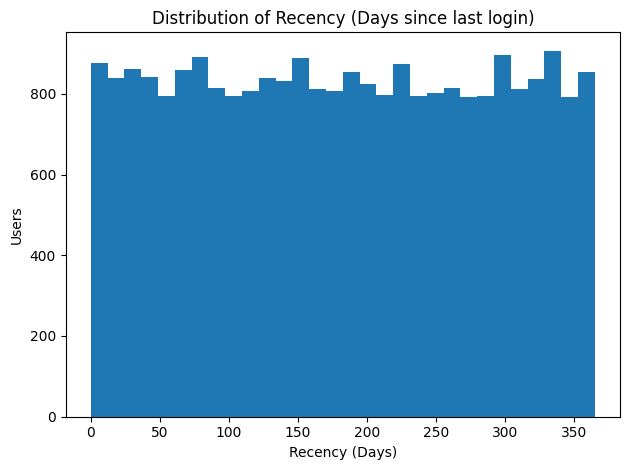

In [ ]:
# Watch time distribution
plt.figure()
plt.hist(df["Watch_Time_Hours"].dropna(), bins=30)
plt.title("Distribution of Watch Time (Hours)")
plt.xlabel("Watch Time (Hours)"); plt.ylabel("Users"); plt.tight_layout(); plt.show()

# Avg watch time by subscription
avg_watch_by_sub = df.groupby("Subscription_Type")["Watch_Time_Hours"].mean().reset_index()
plt.figure()
plt.bar(avg_watch_by_sub["Subscription_Type"], avg_watch_by_sub["Watch_Time_Hours"])
plt.title("Average Watch Time by Subscription Type")
plt.xlabel("Subscription Type"); plt.ylabel("Avg Watch Time (Hours)"); plt.tight_layout(); plt.show()

# Avg watch time by age band
avg_watch_by_age = df.groupby("Age_Band")["Watch_Time_Hours"].mean().reset_index()
plt.figure()
plt.bar(avg_watch_by_age["Age_Band"].astype(str), avg_watch_by_age["Watch_Time_Hours"])
plt.title("Average Watch Time by Age Band")
plt.xlabel("Age Band"); plt.ylabel("Avg Watch Time (Hours)"); plt.tight_layout(); plt.show()

# Recency distribution
plt.figure()
plt.hist(df["Recency_Days"].dropna(), bins=30)
plt.title("Distribution of Recency (Days since last login)")
plt.xlabel("Recency (Days)"); plt.ylabel("Users"); plt.tight_layout(); plt.show()


NameError: name 'np' is not defined

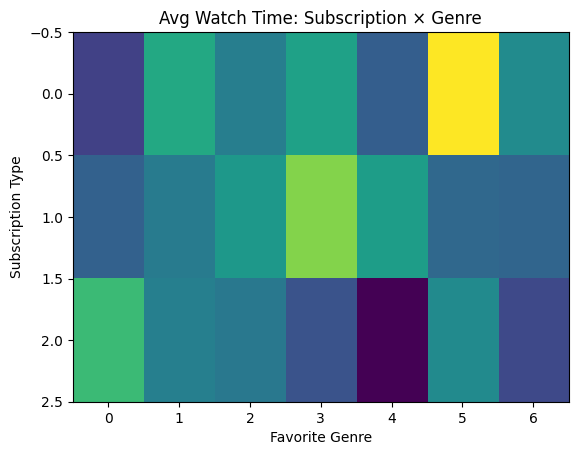

In [ ]:
pivot = df.pivot_table(index="Subscription_Type", columns="Favorite_Genre",
                       values="Watch_Time_Hours", aggfunc="mean")

top_genre_names = df["Favorite_Genre"].value_counts().head(12).index
pivot_small = pivot.loc[:, pivot.columns.intersection(top_genre_names)]

plt.figure()
plt.imshow(pivot_small.values, aspect="auto")
plt.title("Avg Watch Time: Subscription × Genre")
plt.xlabel("Favorite Genre"); plt.ylabel("Subscription Type")
plt.xticks(ticks=np.arange(pivot_small.shape[1]), labels=pivot_small.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(pivot_small.shape[0]), labels=pivot_small.index)
plt.colorbar(); plt.tight_layout(); plt.show()


### Understandibg the reteneion rate of users over the periods of 30-60-90 days.

In [ ]:
def share_recent(d, days):
    return float((d["Recency_Days"] <= days).mean())

retention_summary = pd.DataFrame({
    "Window_Days": [30, 60, 90],
    "Share_Active": [share_recent(df, 30), share_recent(df, 60), share_recent(df, 90)]
})
retention_summary


,Window_Days,Share_Active
0,30,0.08644
1,60,0.16860
2,90,0.25276


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[["Age", "Watch_Time_Hours", "Recency_Days"]].dropna().copy()
scaler = StandardScaler()
X = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# Attach to df
features = features.assign(Segment=labels)
df = df.merge(features[["Segment"]], left_index=True, right_index=True, how="left")

# Segment sizes and profiles
seg_counts = df["Segment"].value_counts(dropna=False).sort_index().rename_axis("Segment").reset_index(name="Users")
seg_profile = df.groupby("Segment")[["Age","Watch_Time_Hours","Recency_Days"]].mean().reset_index()

seg_counts, seg_profile


(   Segment  Users
 0        0   6213
 1        1   6291
 2        2   6276
 3        3   6220,
    Segment        Age  Watch_Time_Hours  Recency_Days
 0        0  43.064381        774.031766     96.290681
 1        1  27.980925        437.905519    267.604038
 2        2  50.466539        236.533459     95.770076
 3        3  64.591158        556.802971    267.410450)

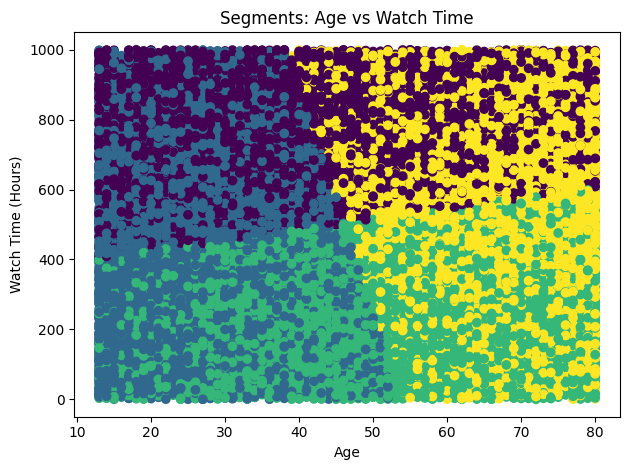

In [ ]:
plt.figure()
mask = df["Segment"].notna()
plt.scatter(df.loc[mask, "Age"], df.loc[mask, "Watch_Time_Hours"], c=df.loc[mask, "Segment"])
plt.title("Segments: Age vs Watch Time")
plt.xlabel("Age"); plt.ylabel("Watch Time (Hours)"); plt.tight_layout(); plt.show()
